In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



genre_glob = {'Asia':['k-pop','c-pop','mandopop','anime','k-indie','chinese indie','anime score','mainland chinese pop',
                      'chinese hip hop','k-hop'], 
               'Europe':['chillhop','electropop','lo-fi beats','baroque','acoustic pop','art pop'],
               'America':['pop','alternative r&b','contemporary country','bass trap','alternative hip hop','chamber pop',
                         'hip hop','acoustic pop','canadian pop','latin','art pop'],
               'Oceania':['australian pop'],
               'Other':['none','dance pop','background music','big room','classical','calming instrumental','boy band',
                        'compositional ambient','sleep','focus','bebop','cali rap']}

genre_asia = {'Madarin':['c-pop','mandopop','chinese indie','chinese hip hop','mainland chinese pop'],
            'Taiwan':['taiwan pop','taiwan hip hop','taiwanese pop','taiwan singer-songwriter','taiwan indie'],
            'China':['c-pop','mandopop','chinese indie','mainland chinese pop','chinese hip hop'],
            'Hong-kong':['c-pop','mandopop','chinese indie','chinese hip hop'],
            'Japan':['anime','anime score'],
            'Korea':['k-pop','k-indie','k-hop']}

genre_america = {'North-America':['pop','adult standards','alternative r&b','contemporary country','bass trap',
                                'alternative hip hop','hip hop','art pop'],
               'Canada':['canadian pop'],
               'South-America':['latin']}

genre_europe = {'England':['electropop','lo-fi beats','art pop'],
              'Netherlands':['chillhop'],
              'Itali':['baroque']}

In [2]:

data = pd.read_csv('spotify_unique_ver4.csv')

tem = []
for i in range(data.shape[0]):
    tem.append(data['release_date'][i].split('-')[0])
data['release_date'] = tem

data = data[data['release_date']!='2020']

In [3]:
genre_glob = {'Asia':['k-pop','c-pop','mandopop','anime','k-indie','chinese indie','anime score','mainland chinese pop',
                      'chinese hip hop','k-hop'], 
               'Europe':['chillhop','electropop','lo-fi beats','baroque','acoustic pop','art pop'],
               'America':['pop','alternative r&b','contemporary country','bass trap','alternative hip hop','chamber pop',
                         'hip hop','acoustic pop','canadian pop','latin','art pop'],
               'Oceania':['australian pop'],
               'Other':['none','dance pop','background music','big room','classical','calming instrumental','boy band',
                        'compositional ambient','sleep','focus','bebop','cali rap']}

genre_asia = {'Madarin':['c-pop','mandopop','chinese indie','chinese hip hop','mainland chinese pop'],
            'Taiwan':['taiwan pop','taiwan hip hop','taiwanese pop','taiwan singer-songwriter','taiwan indie'],
            'China':['c-pop','mandopop','chinese indie','mainland chinese pop','chinese hip hop'],
            'Hong-kong':['c-pop','mandopop','chinese indie','chinese hip hop'],
            'Japan':['anime','anime score'],
            'Korea':['k-pop','k-indie','k-hop']}

genre_america = {'North-America':['pop','adult standards','alternative r&b','contemporary country','bass trap',
                                'alternative hip hop','hip hop','art pop'],
               'Canada':['canadian pop'],
               'South-America':['latin']}

genre_europe = {'England':['electropop','lo-fi beats','art pop'],
              'Netherlands':['chillhop'],
              'Itali':['baroque']}

In [4]:
def as_feature_pop(data,popularity = 70):
    return data[data['popularity'] > popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']] 
def as_feature_unpop(data,popularity = 30):
    return data[data['popularity'] < popularity].loc[:,['danceability','acousticness', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence','key','loudness','tempo','mode', 'artist_popularity']]  


In [30]:
Data_Asia = data[data['genres'].isin(genre_glob['Asia'])]

In [31]:
year = [str(i) for i in range(2019 , 2001, -1)]

# 拿到當年的Data並存在Datas裡面
def get_year_data(data , number):
    return data[data['release_date']== str(number) ]
datas = {y :get_year_data(Data_Asia, y) for y in year }

In [32]:
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
data_features_up = {i : as_feature_unpop( datas[i] ,datas[i]['popularity'].describe()['25%']) for i in datas}

In [33]:
def plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p):
    years = []
    for i in range(start_year , end_year +1):
        years.append(str(i))
    plt.subplot(2,2,1)
    plt.hist(data[years[0]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(2,2,2)
    plt.hist(data[years[1]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(2,2,3)
    plt.hist(data[years[2]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
    plt.subplot(2,2,4)
    plt.hist(data[years[3]]['artist_popularity'], bins=10, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

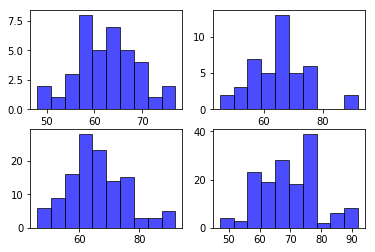

In [35]:
plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p)

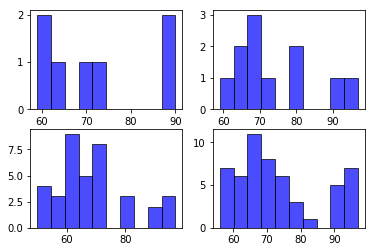

In [40]:
Data_Europe = data[data['genres'].isin(genre_glob['Europe'])]
datas = {y :get_year_data(Data_Europe, y) for y in year }
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p)

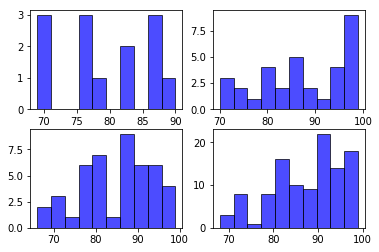

In [39]:
Data_America = data[data['genres'].isin(genre_glob['America'])]
datas = {y :get_year_data(Data_America, y) for y in year }
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p)

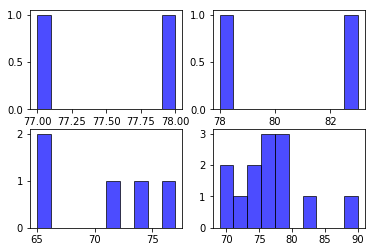

In [42]:
Data_Oceania = data[data['genres'].isin(genre_glob['Oceania'])]
datas = {y :get_year_data(Data_Oceania, y) for y in year }
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p)

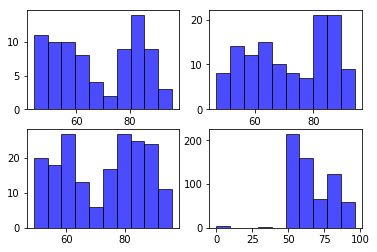

In [43]:
Data_Other = data[data['genres'].isin(genre_glob['Other'])]
datas = {y :get_year_data(Data_Other, y) for y in year }
data_features_p = {i : as_feature_pop( datas[i] ,datas[i]['popularity'].describe()['75%']) for i in datas}
plot_histogram(start_year = 2016 , end_year = 2019, data = data_features_p)